# EDA

In [19]:
import os
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf, acf, pacf


In [20]:
df = pd.read_csv('..\\DQC and ETL\\sales_train_complete.csv')

## Time series analysis

Firstly let's check overall sales dynamics:
- by year
- by month
- by day

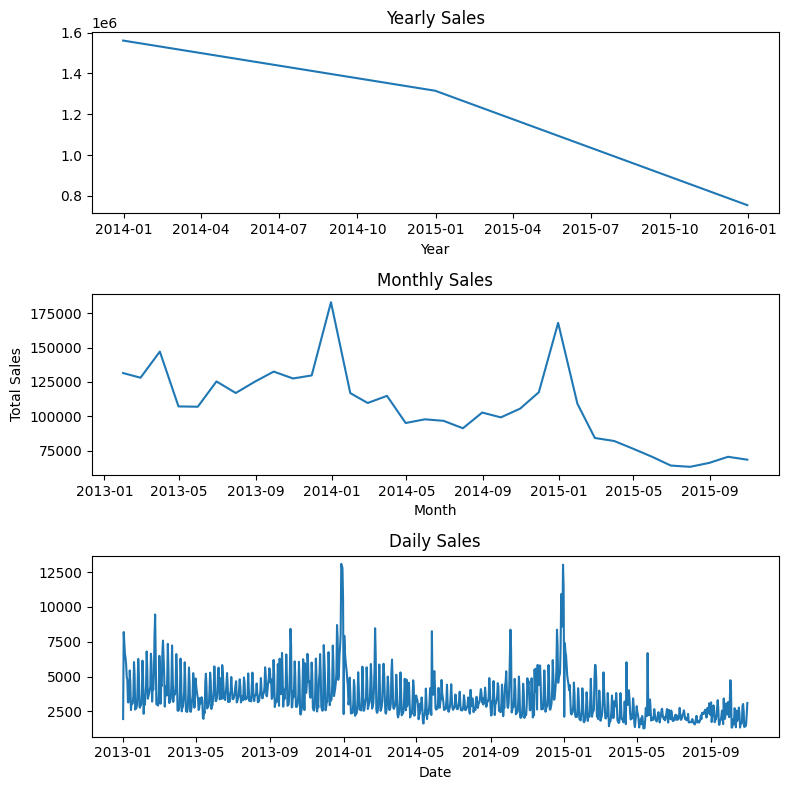

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.plot(df.resample('YE', on='date')['item_cnt_day'].sum(), label='Yearly sales')
plt.title('Yearly Sales')
plt.xlabel('Year')

plt.subplot(3, 1, 2)
plt.plot(df.resample('ME', on='date')['item_cnt_day'].sum(), label='Monthly sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(3, 1, 3)
plt.plot(df.resample('D', on='date')['item_cnt_day'].sum(), label='Daily sales (30-day MA)')
plt.title('Daily Sales')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

- We see that sales peaks during holidays, this is evident both in monthly and daily dynamics.
- The sales are falling from year to year, with the highest sales in 2013 and the lowest in 2015.

Let's check item_price and saled item_id dynamics

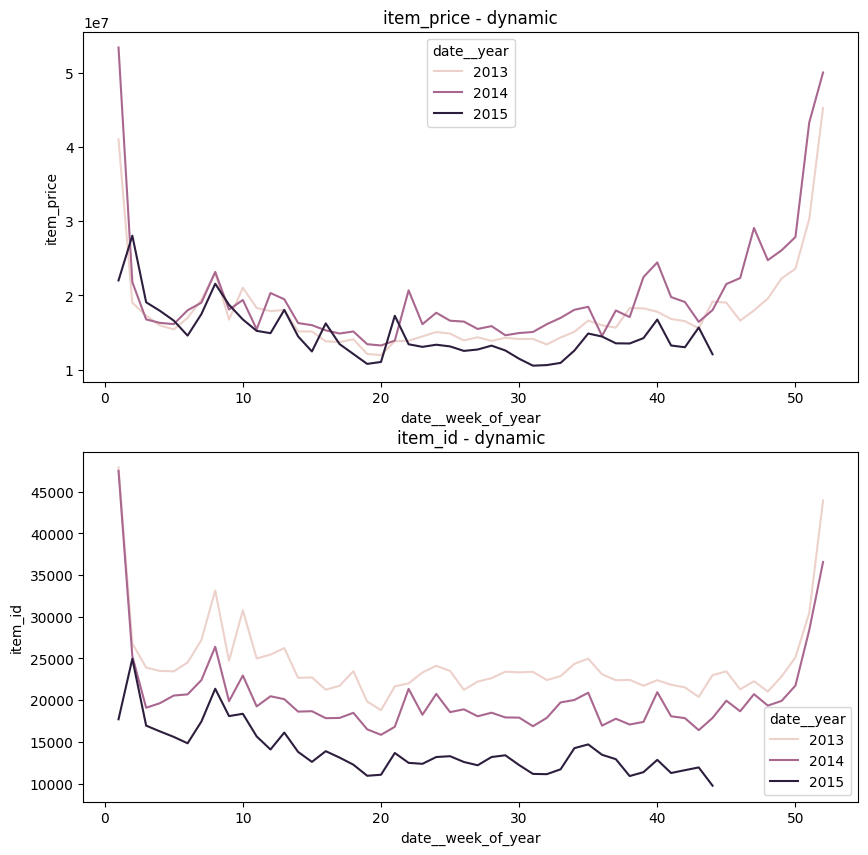

In [25]:
year_patterns = df.groupby(['date__week_of_year', 'date__year']).agg({
    'item_price': 'sum',
    'item_id': 'count',
}).reset_index()

fig, axs = plt.subplots(len(year_patterns.columns) - 2, 1, figsize=(10, (len(year_patterns.columns) - 2) * 5))
    
for idx, col in enumerate(year_patterns.columns[2:]):
    sns.lineplot(data=year_patterns, x='date__week_of_year', y=col, hue='date__year', ax=axs[idx]).set_title(f"{col} - dynamic")

- We see again that sales are falling from year to year.
- Seasonal fluctuations in the number of goods are also evident, with increases in certain weeks (for example, in the pre-New Year period).

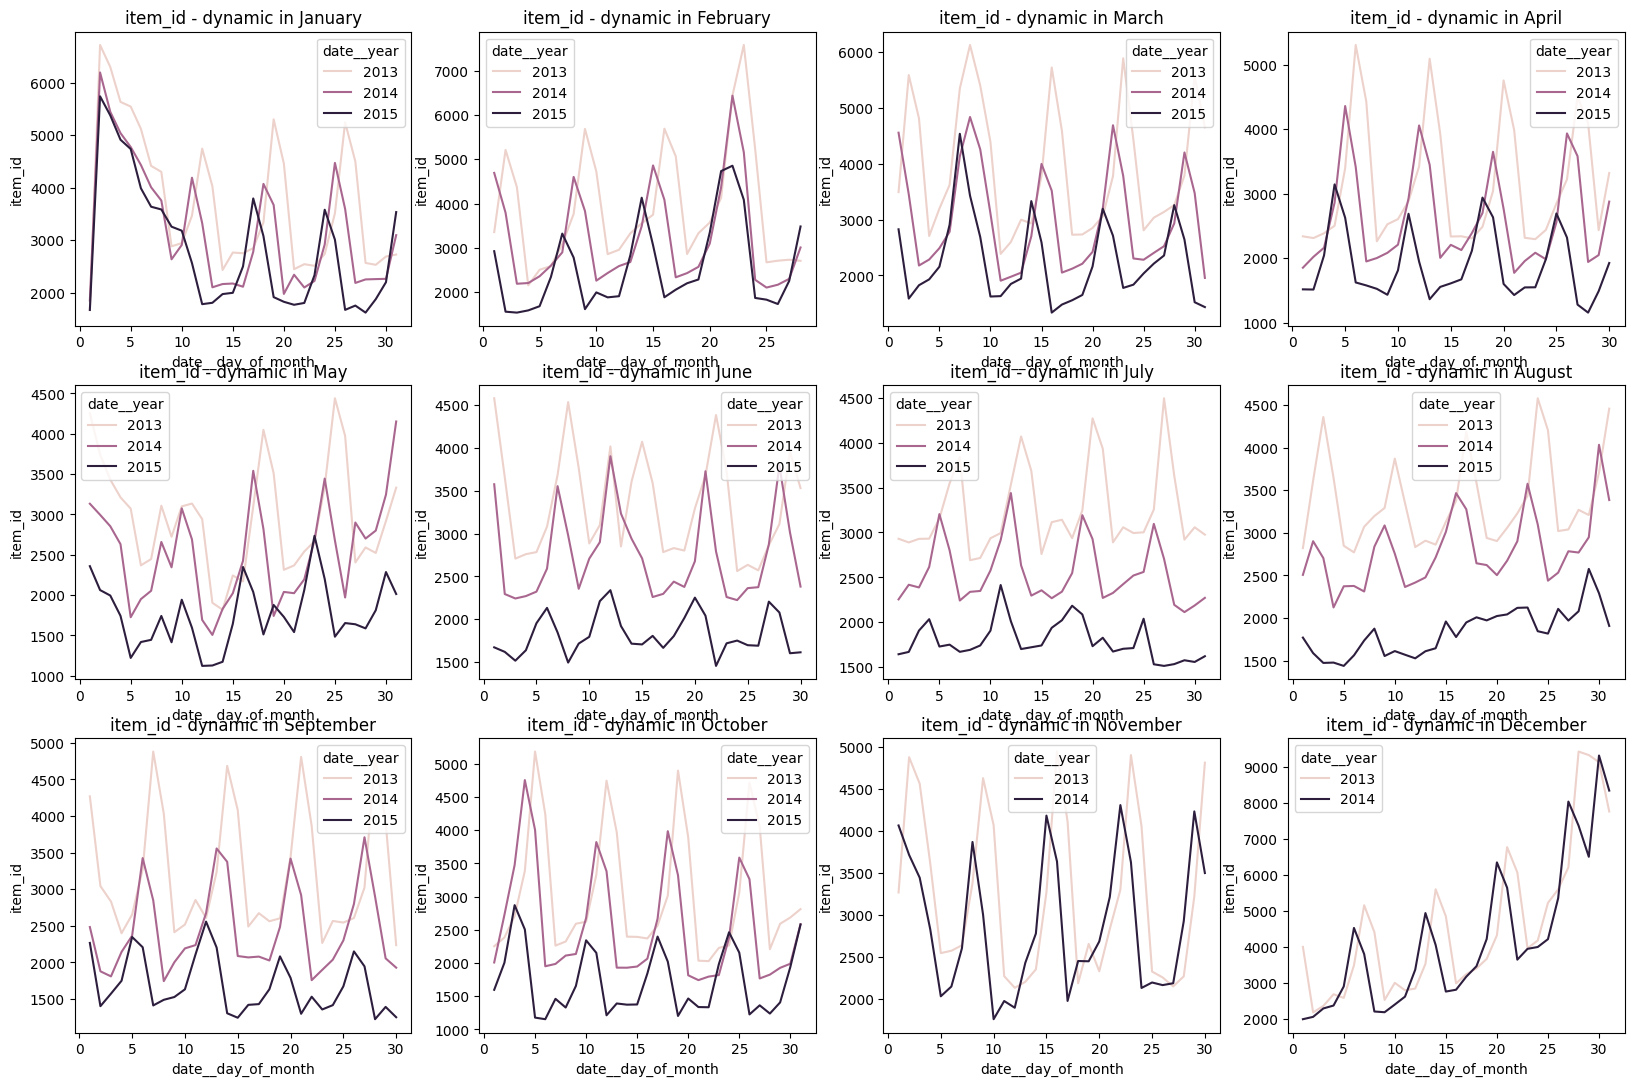

In [30]:
p_year_patterns = df.groupby(['date__day_of_month', 'date__month_of_year', 'date__year']).agg({
    'item_id': 'count',
}).reset_index()

fig, axs = plt.subplots(3, 4, figsize=(20, 13))
    
for month in range(1,13):
    sns.lineplot(data=p_year_patterns[p_year_patterns.date__month_of_year == month],
    x='date__day_of_month', y='item_id', hue='date__year',
    ax=axs[(month - 1) // 4][(month - 1) % 4]).set_title(f"{col} - dynamic in {calendar.month_name[month]}")

- Seasonality of demand for goods is evident. In most months, the quantity of goods fluctuates depending on the day of the month, with peaks on certain days, apparently the weekends.
- No data available for November and December 2015.

In general, graphs tell the same things.

Plot autocorrelation graphs to determine dependencies within data

<Figure size 1200x600 with 0 Axes>

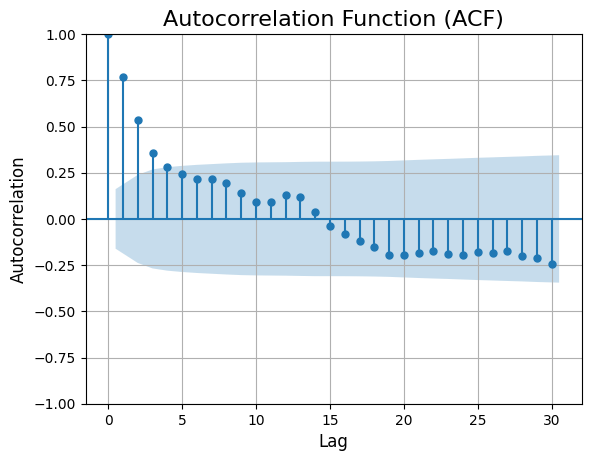

<Figure size 1200x600 with 0 Axes>

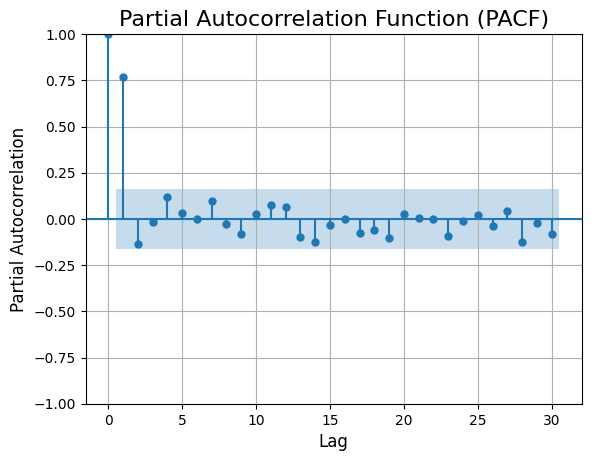

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sales_by_date = df.groupby('date__week').agg({'item_price': 'sum'}).reset_index()

sales_by_date = sales_by_date.sort_values('date__week')

plt.figure(figsize=(12, 6))
plot_acf(sales_by_date['item_price'], lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF)', fontsize=16)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(sales_by_date['item_price'], lags=30, alpha=0.05, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)', fontsize=16)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.grid(True)
plt.show()


## Let's check what's happening with the goods

Firstly let's check item revenue distribution over all items

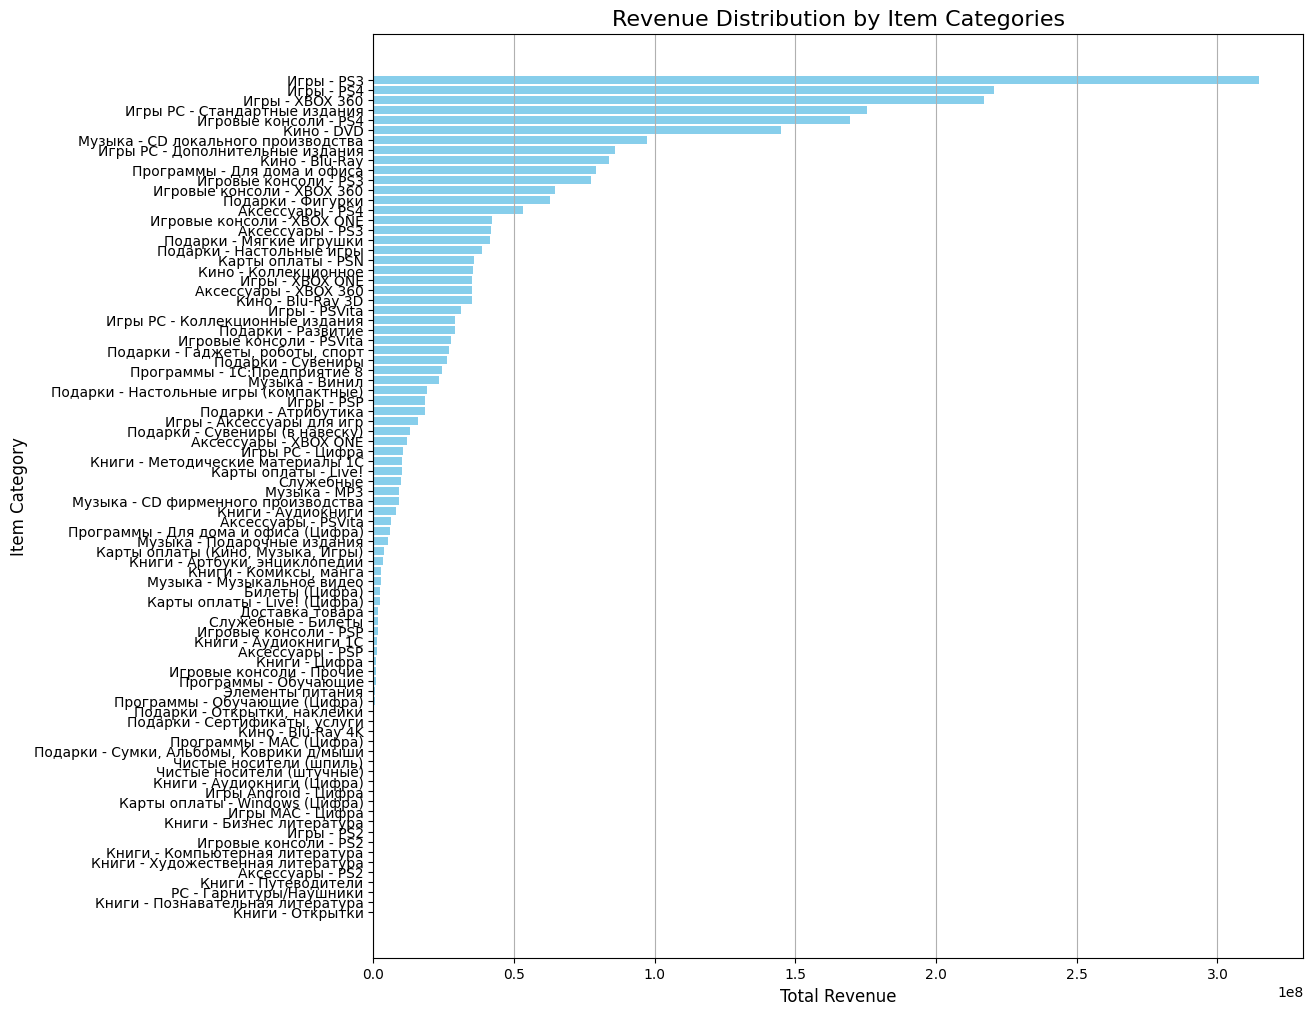

In [27]:
category_sales = df.groupby('item_category_name').agg({'item_price': 'sum'}).reset_index()

category_sales = category_sales.sort_values(by='item_price', ascending=False)

plt.figure(figsize=(12, 12))
plt.barh(category_sales['item_category_name'], category_sales['item_price'], color='skyblue')
plt.title('Revenue Distribution by Item Categories', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Item Category', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


Most sales come from games, music and software.

Let's check the dynamics over sold item categories.

<Figure size 1200x1800 with 0 Axes>

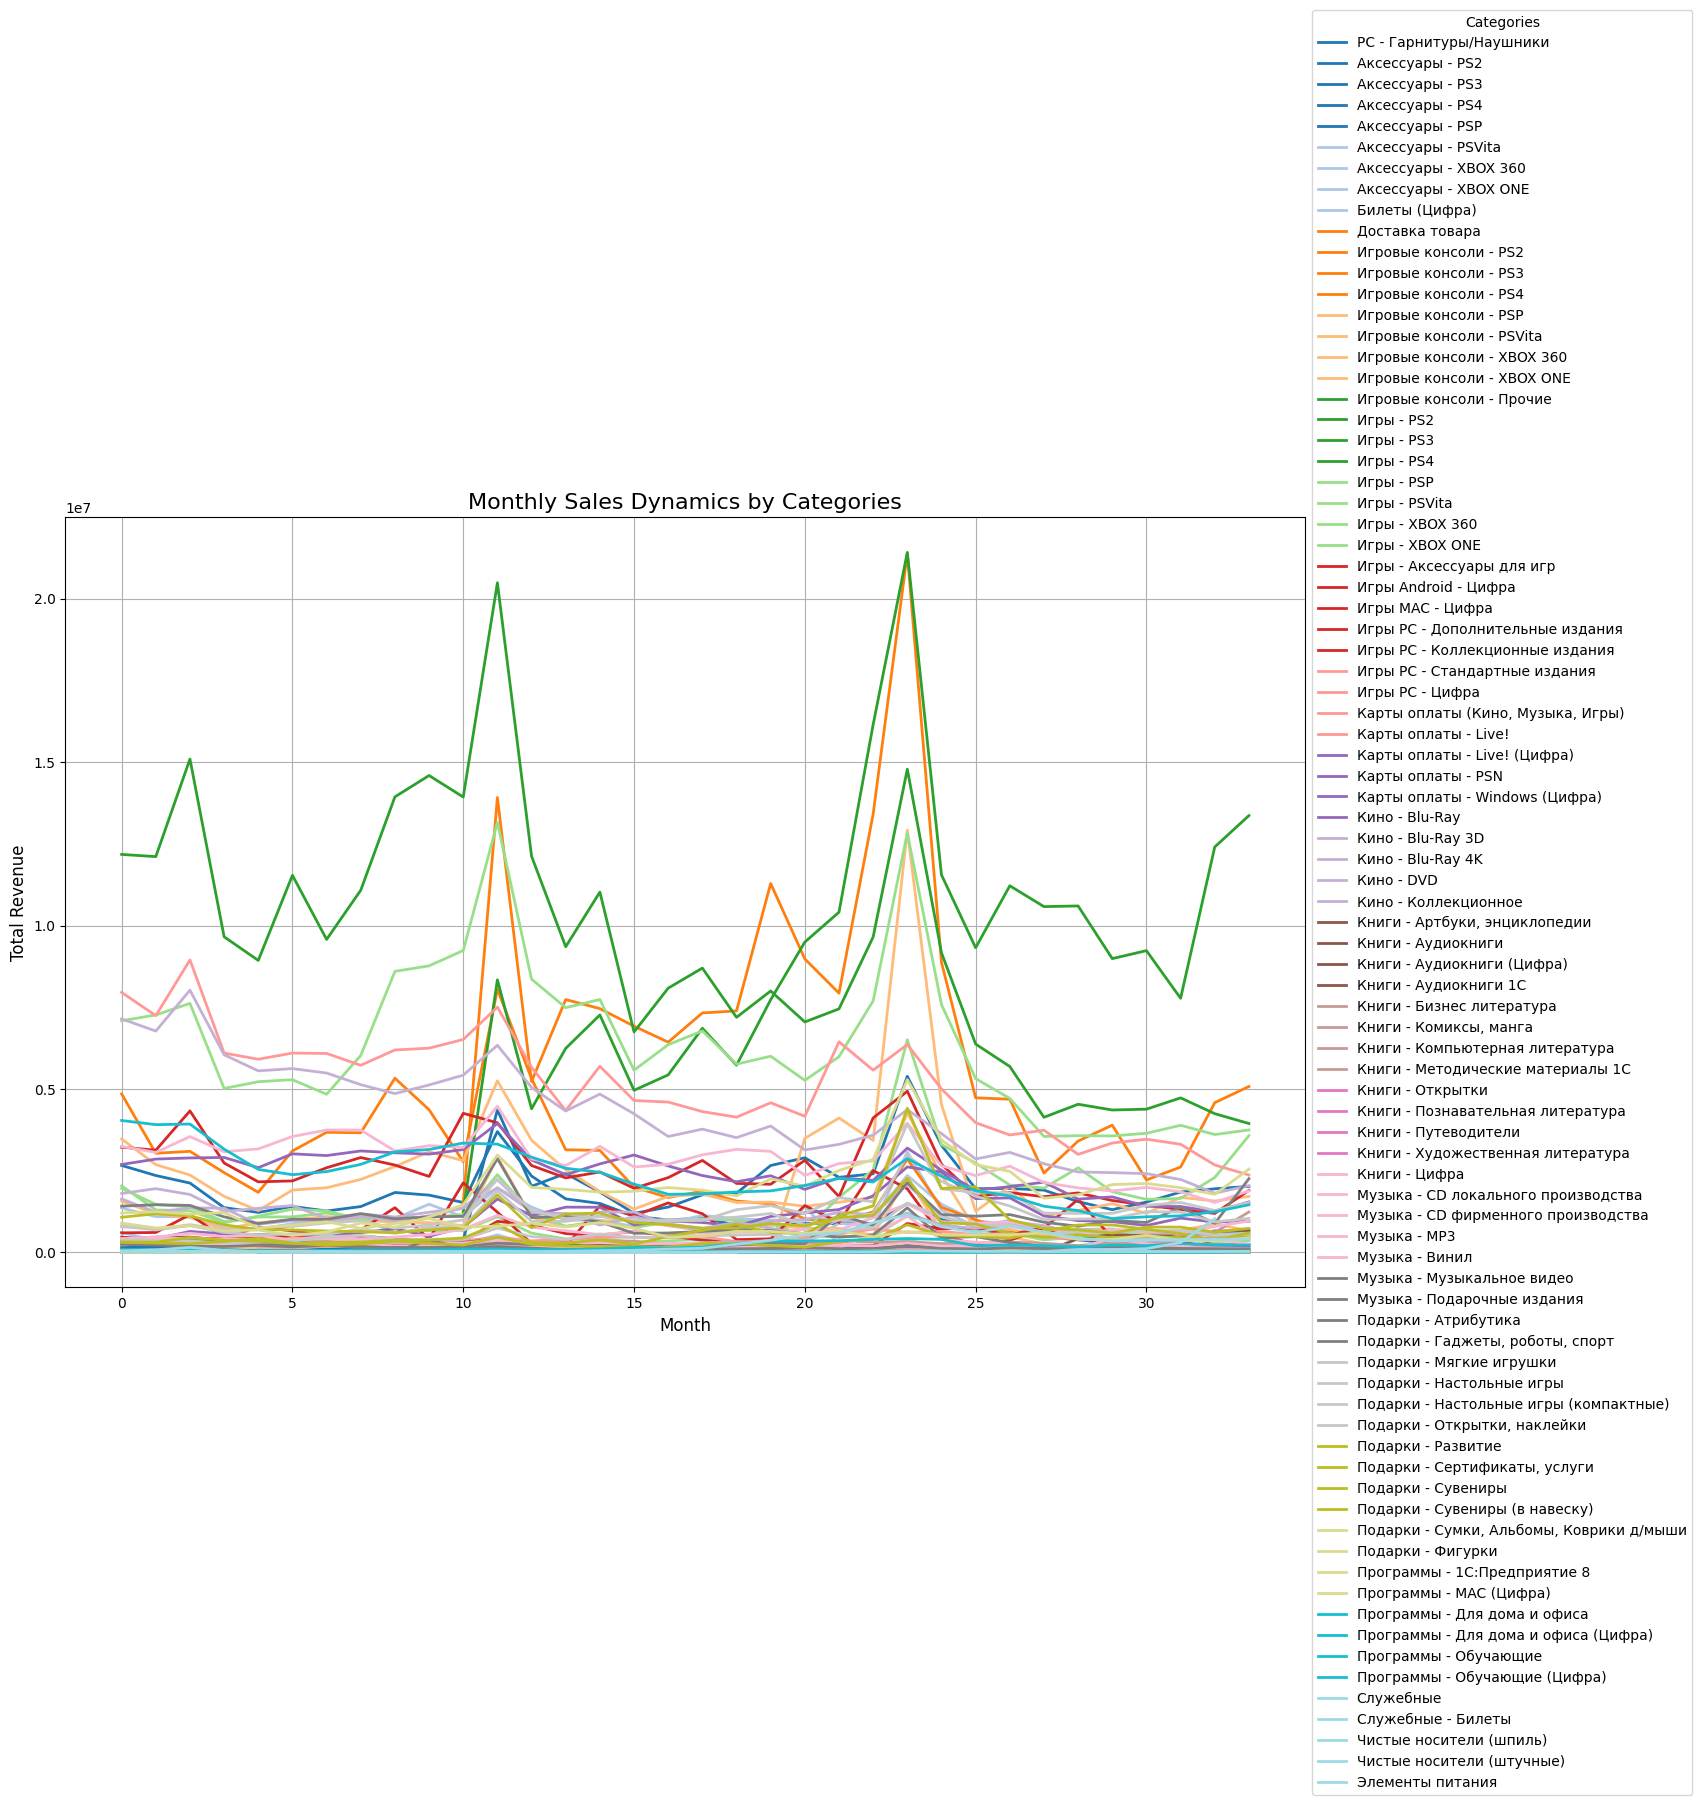

In [36]:
category_monthly_sales = df.groupby(['date__month', 'item_category_name']).agg({'item_price': 'sum'}).reset_index()

category_monthly_sales_pivot = category_monthly_sales.pivot(index='date__month', columns='item_category_name', values='item_price')

plt.figure(figsize=(12, 18))
category_monthly_sales_pivot.plot(kind='line', figsize=(16, 10), colormap='tab20', linewidth=2)
plt.title('Monthly Sales Dynamics by Categories', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Categories')
plt.grid(True)
plt.show()


Again, we see annual dependencies. Some categories are more subject to them, some less, but on average the dependence is strong.

## What's going on with shops?

Firstly checking revenue distribution over all shops

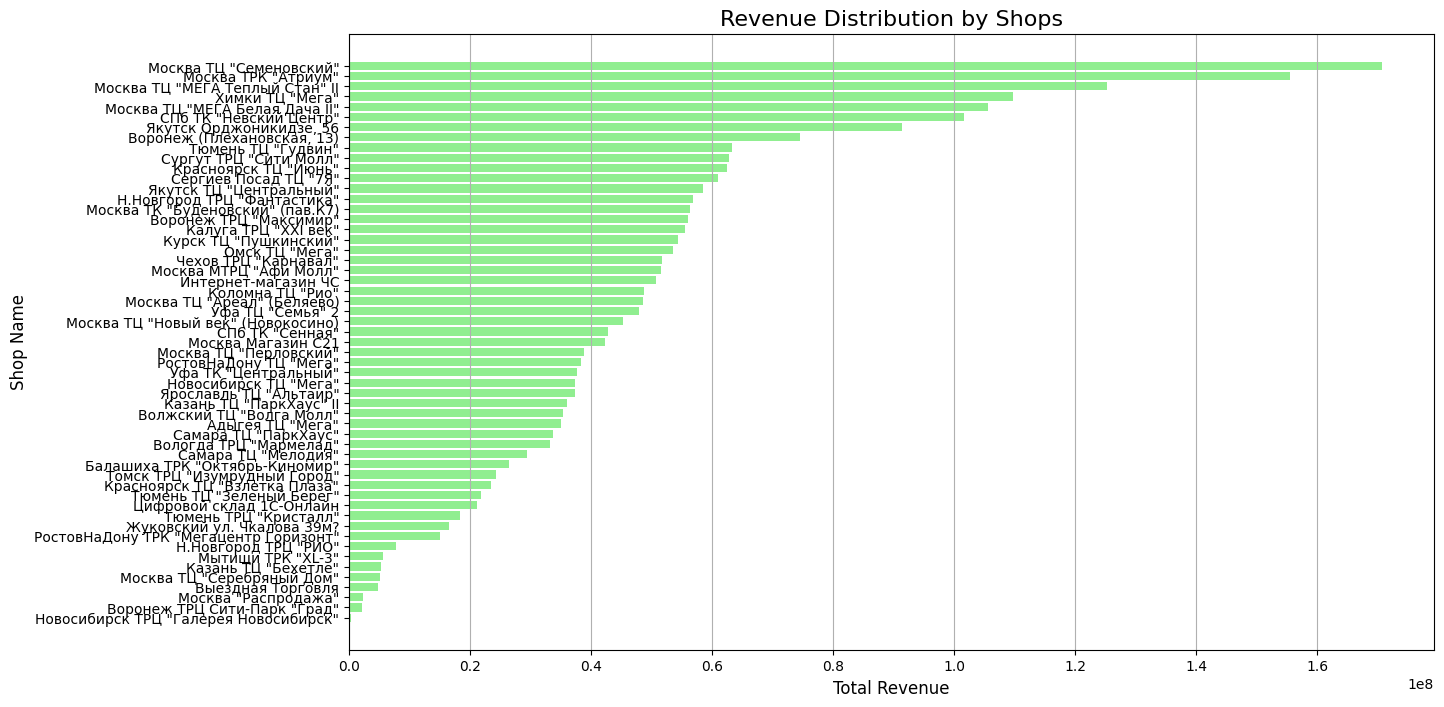

In [ ]:
shop_sales = df.groupby('shop_name').agg({'item_price': 'sum'}).reset_index()

shop_sales = shop_sales.sort_values(by='item_price', ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(shop_sales['shop_name'], shop_sales['item_price'], color='lightgreen')
plt.title('Revenue Distribution by Shops', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Shop Name', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

Most of the best-selling stores are located in Moscow, and those that sell less are in the provinces. But overall the distribution is more even than that of product categories.

Checking monthly sales dynamics

<Figure size 1600x1000 with 0 Axes>

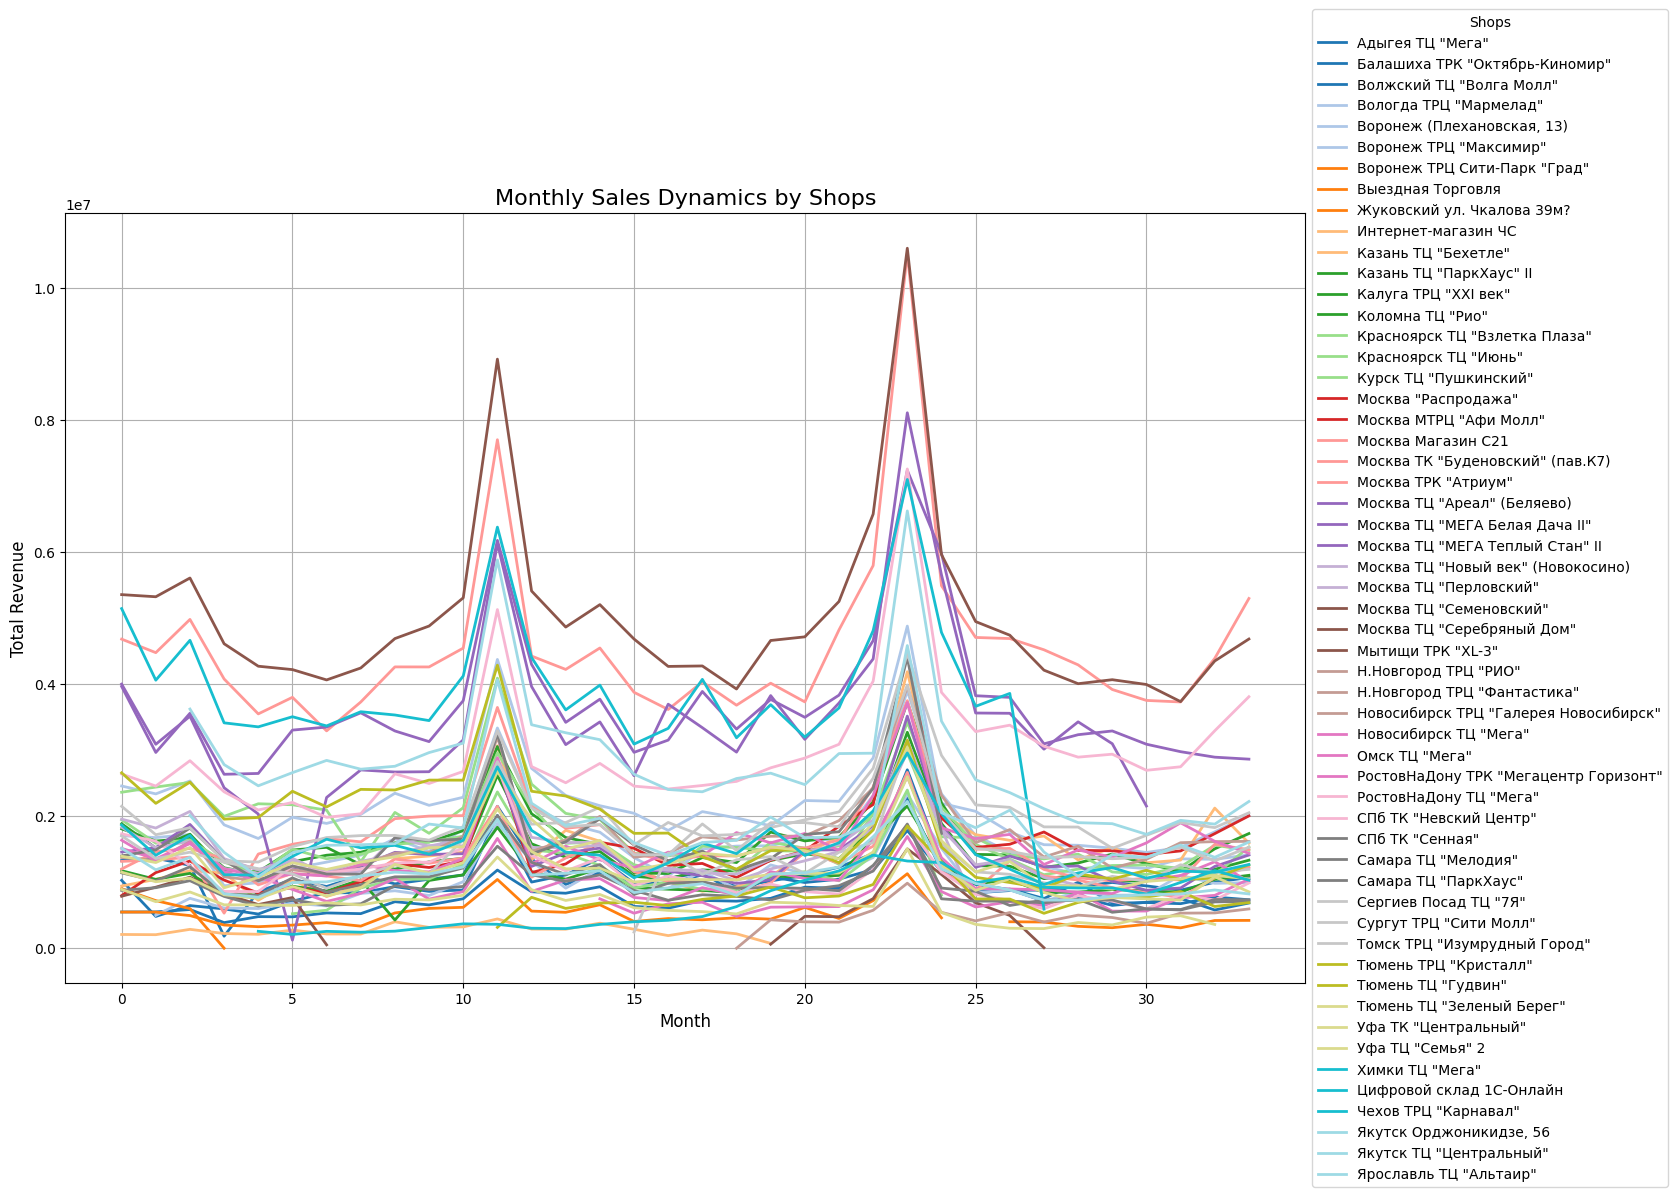

In [ ]:
shop_monthly_sales = df.groupby(['date__month', 'shop_name']).agg({'item_price': 'sum'}).reset_index()

shop_monthly_sales_pivot = shop_monthly_sales.pivot(index='date__month', columns='shop_name', values='item_price')

plt.figure(figsize=(16, 10))
shop_monthly_sales_pivot.plot(kind='line', figsize=(16, 10), colormap='tab20', linewidth=2)
plt.title('Monthly Sales Dynamics by Shops', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Shops')
plt.grid(True)
plt.show()

Annual dependencies appear even stronger

Now would be useful to see how similar are shops based on sales characteristics

c:\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


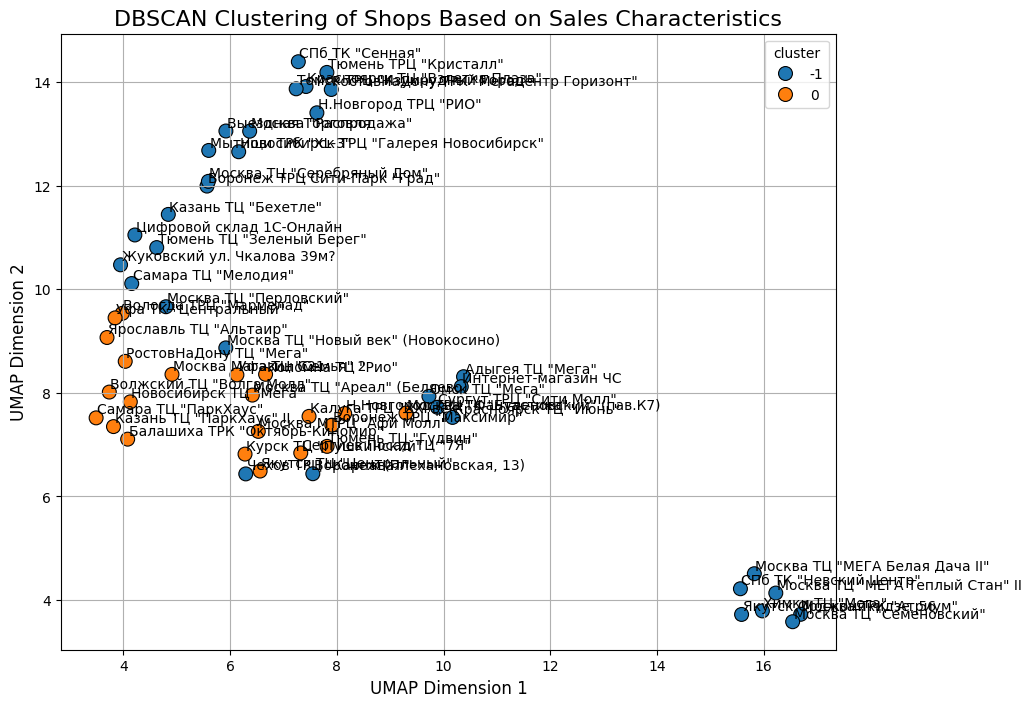

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import umap.umap_ as umap

shop_features = df.groupby('shop_name').agg({
    'item_price': 'sum',  
    'item_id': 'sum', 
    'date__month': lambda x: x.nunique(),
}).reset_index()

avg_item_price = df.groupby('shop_name')['item_price'].mean().reset_index()
avg_item_price.columns = ['shop_name', 'avg_item_price']

shop_features = pd.merge(shop_features, avg_item_price, on='shop_name')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(shop_features[['item_price', 'item_id', 'avg_item_price', 'date__month']])

umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(scaled_features)

dbscan = DBSCAN(eps=0.5, min_samples=5)
shop_features['cluster'] = dbscan.fit_predict(scaled_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=shop_features['cluster'], palette='tab10', s=100, edgecolor='k', legend='full')
plt.title('DBSCAN Clustering of Shops Based on Sales Characteristics', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True)

for i, shop_name in enumerate(shop_features['shop_name']):
    x, y = umap_embeddings[i, :]
    plt.text(x + 0.02, y + 0.02, shop_name, fontsize=10, ha='left', va='bottom', color='black')

plt.show()


In the distribution of sales, some stores from Moscow, Yakutsk and St. Petersburg turned out to be outsiders. I can’t determine any special dependencies among these stores, which is really strange.

Now would be useful to see how similar are shops based on their assortment

c:\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


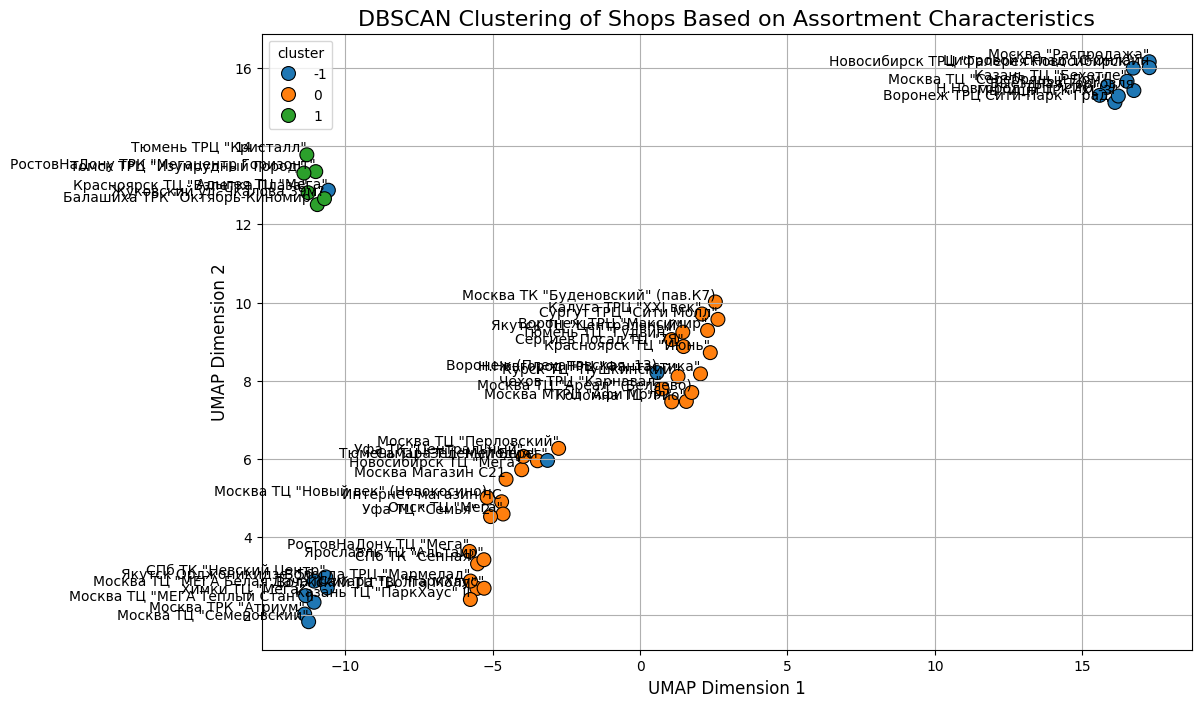

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

shop_assortment = df.groupby('shop_name').agg({
    'item_id': 'nunique',  
    'item_price': 'sum', 
    'item_category_id': lambda x: x.nunique(), 
}).reset_index()

shop_assortment['total_items'] = df.groupby('shop_name')['item_id'].sum().values

scaler = StandardScaler()
scaled_assortment = scaler.fit_transform(shop_assortment[['item_id', 'item_price', 'item_category_id', 'total_items']])

umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(scaled_assortment)

dbscan = DBSCAN(eps=0.5, min_samples=5)
shop_assortment['cluster'] = dbscan.fit_predict(scaled_assortment)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=shop_assortment['cluster'], palette='tab10', s=100, edgecolor='k', legend='full')

for i in range(len(shop_assortment)):
    plt.text(umap_embeddings[i, 0], umap_embeddings[i, 1], shop_assortment['shop_name'].iloc[i],
             fontsize=10, ha='right', va='bottom')

plt.title('DBSCAN Clustering of Shops Based on Assortment Characteristics', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True)
plt.show()


Three main clusters were identified, similar to the fact that two clusters are provinces, one is the central region of Russia. This graph looks more reasonable than the previous one.